<a href="https://colab.research.google.com/github/shambhavithakur/marketing-subscription-predictor/blob/main/marketing_subs_model_creation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting whether or not a customer will purchase a marketing subscription: Model creation with PyCaret [1]

## Importing the most relevant machine-learning libraries

In [1]:
# Installing PyCaret
!pip install pycaret[full] &> /dev/null

In [2]:
# Enabling Colab mode so that PyCaret can display interactive graphs in this notebook
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [3]:
# Importing pandas and the PyCaret classification module

import pandas as pd
from pycaret import classification as clf 

## Loading the training data set

In [4]:
# Using pandas to load the dataset

import pandas as pd

base_path = '/content/drive/MyDrive/ml/20201015-marketing-subs/'

train = pd.read_feather(base_path + 'train')
test = pd.read_feather(base_path + 'test')

In [5]:
# Viewing summarized information about the newly loaded datasets
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35511 entries, 0 to 35510
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              35507 non-null  float64 
 1   job              35511 non-null  category
 2   marital          35511 non-null  category
 3   education        35511 non-null  category
 4   default          35511 non-null  category
 5   housing          35511 non-null  category
 6   loan             35511 non-null  category
 7   contact          35506 non-null  category
 8   month            35511 non-null  category
 9   day_of_week      35511 non-null  category
 10  day_of_week_sin  35511 non-null  category
 11  day_of_week_cos  35511 non-null  category
 12  campaign         35511 non-null  int64   
 13  pdays            31873 non-null  float64 
 14  is_new_prospect  35511 non-null  category
 15  previous         35511 non-null  category
 16  poutcome         35511 non-null  categor

In [6]:
train.shape, test.shape

((35511, 23), (3946, 23))

## Setting up a PyCaret environment

In [7]:
# Setting up a PyCaret environment and preparing data for model building

seed = 42

exp_clf = clf.setup(data = train, target = 'bought',
                           fix_imbalance=True, imputation_type='iterative', 
                           categorical_imputation='mode', numeric_imputation='median',
                           feature_selection=True, feature_interaction=True, feature_ratio=True,
                           normalize = True, transformation = True,
                           bin_numeric_features=['age'], remove_outliers=True, 
                           combine_rare_levels = True, rare_level_threshold = 0.05,
                           remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
                           remove_perfect_collinearity=True, 
                           ignore_low_variance = True, create_clusters=True,
                           session_id=seed, use_gpu=False,
                           fold_shuffle=True, data_split_stratify=True)

,Description,Value
0,session_id,42
1,Target,bought
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(35511, 23)"
5,Missing Values,True
6,Numeric Features,6
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
training_data = clf.get_config(variable="X_train")
training_data.head(3)

,contact_cellular,nr_employed_4991.6,cons_conf_idx,cons_price_idx,poutcome_failure,month_apr,marital_married,loan_no,previous_2,age_4.0,age_8.0,day_of_week_4,day_of_week_1,month_nov,month_sep,housing_yes,nr_employed_5008.7,age_3.0,emp_var_rate_-1.8,job_administration_management,poutcome_success,nr_employed_5017.5,month_mar,month_may,campaign,euribor3m,age_5.0,nr_employed_5191.0,default_no,education_unknown,age_0.0,month_oct,age_9.0,job_blue_collar,education_high.school,job_services,job_student,age_6.0,month_aug,job_no_active_income,...,euribor3m_multiply_job_administration_management,job_administration_management_multiply_poutcome_success,nr_employed_5076.2_multiply_contact_cellular,nr_employed_5076.2_multiply_euribor3m,housing_yes_multiply_cons_conf_idx,age_2.0_multiply_euribor3m,cons_conf_idx_multiply_day_of_week_1,cons_conf_idx_multiply_default_no,cons_price_idx_divide_campaign,euribor3m_multiply_job_blue_collar,cons_conf_idx_multiply_emp_var_rate_-1.8,campaign_multiply_cons_price_idx,euribor3m_multiply_day_of_week_1,nr_employed_5195.8_multiply_euribor3m,cons_conf_idx_multiply_loan_no,cons_price_idx_multiply_job_administration_management,euribor3m_multiply_campaign,poutcome_success_multiply_euribor3m,previous_1_multiply_poutcome_success,age_1.0_multiply_campaign,euribor3m_divide_cons_price_idx,cons_price_idx_divide_cons_conf_idx,cons_conf_idx_divide_campaign,campaign_divide_cons_price_idx,campaign_multiply_euribor3m,cons_price_idx_multiply_housing_yes,poutcome_success_multiply_contact_cellular,campaign_multiply_cons_conf_idx,euribor3m_multiply_age_1.0,campaign_divide_euribor3m,age_5.0_multiply_euribor3m,euribor3m_multiply_cons_conf_idx,cons_price_idx_multiply_campaign,campaign_multiply_age_3.0,default_no_multiply_contact_cellular,job_administration_management_multiply_euribor3m,cons_price_idx_divide_euribor3m,euribor3m_multiply_loan_no,marital_married_multiply_euribor3m,euribor3m_divide_cons_conf_idx
23940,1.0,0.0,-0.258347,-0.685067,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.810889,-0.090262,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,0.0,0.0,-0.00000,-0.258347,-0.000000,-0.258347,-0.258347,-0.844834,-0.090262,-0.0,-0.555513,-0.090262,-0.090262,-0.258347,-0.0,-0.073192,-0.0,0.0,0.0,0.131756,2.651730,-0.318597,-1.183664,-0.073192,-0.685067,0.0,-0.209491,-0.0,-8.983724,-0.0,0.023319,-0.555513,0.810889,1.0,-0.0,7.589759,-0.090262,-0.090262,0.349383
14341,1.0,0.0,1.803745,-2.130622,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.043309,-1.416550,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,-0.0,0.0,1.0,-1.41655,0.000000,-0.000000,0.000000,1.803745,2.042178,-0.000000,0.0,2.222897,-0.000000,-0.000000,1.803745,-0.0,1.477899,-0.0,0.0,-0.0,0.664853,-1.181221,-1.728870,0.489673,1.477899,-0.000000,0.0,-1.881863,-0.0,0.736514,-0.0,-2.555095,2.222897,-1.043309,1.0,-0.0,1.504092,-1.416550,-1.416550,-0.785338
25399,1.0,0.0,0.957899,-0.293439,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.810889,0.865738,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.00000,0.957899,0.865738,0.957899,0.957899,-0.361873,0.865738,0.0,-0.237946,0.865738,0.000000,0.957899,-0.0,0.702017,0.0,0.0,0.0,-2.950320,-0.306336,1.181295,-2.763399,0.702017,-0.293439,0.0,0.776749,0.0,0.936644,0.0,0.829290,-0.237946,0.000000,1.0,0.0,-0.338946,0.865738,0.000000,0.903789


## Comparing the performances of multiple models

In [9]:
models = clf.compare_models(sort='F1', budget_time=7, n_select=2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.8628,0.7458,0.4911,0.3523,0.4101,0.3349,0.3409,0.306
gbc,Gradient Boosting Classifier,0.8976,0.7569,0.3162,0.4628,0.3752,0.3216,0.3288,28.336
ada,Ada Boost Classifier,0.8818,0.7366,0.3637,0.3853,0.3736,0.3085,0.3090,5.987
ridge,Ridge Classifier,0.7919,0.0000,0.5940,0.2548,0.3566,0.2554,0.2881,0.337
lr,Logistic Regression,0.7911,0.7540,0.5957,0.2541,0.3562,0.2548,0.2879,10.802
rf,Random Forest Classifier,0.8932,0.7305,0.2660,0.4226,0.3263,0.2715,0.2802,9.794
svm,SVM - Linear Kernel,0.6808,0.0000,0.6066,0.1787,0.2746,0.1460,0.1884,1.176
knn,K Neighbors Classifier,0.7174,0.6752,0.5487,0.1825,0.2738,0.1499,0.1851,2.913
dt,Decision Tree Classifier,0.8452,0.5965,0.2796,0.2425,0.2594,0.1736,0.1742,1.502
qda,Quadratic Discriminant Analysis,0.1001,0.5011,0.9987,0.0973,0.1773,0.0004,0.0094,0.868


## Obtaining predictions from the topmost model

### Using graphs to understand the performance of the model

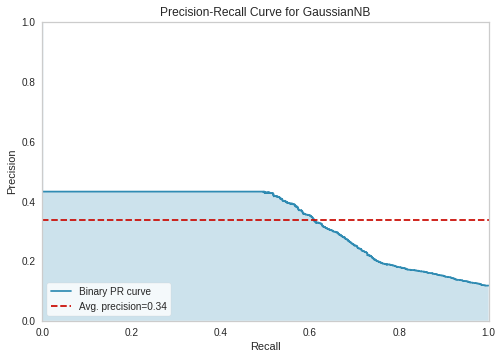

In [10]:
# Precision recall
clf.plot_model(models[0], plot='pr')

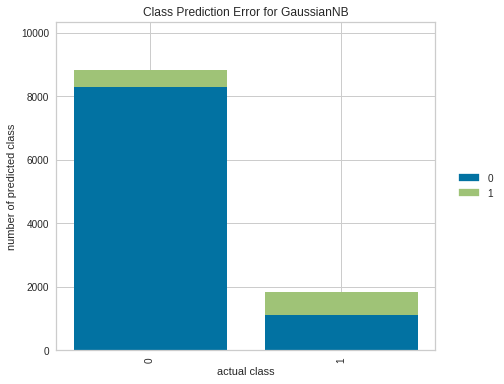

In [11]:
# Error 
clf.plot_model(models[0], plot='error')

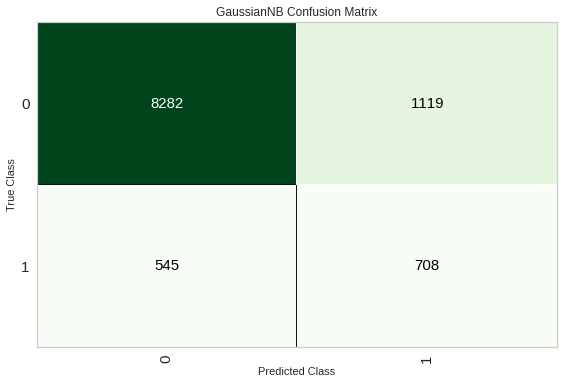

In [12]:
# Confusion matrix
clf.plot_model(models[0], plot='confusion_matrix')

In [14]:
# Deriving additional meaning from the naive-bayes classifier's confusion matrix
# T = True, F = False, P = Positive, N = Negative
# TN | FP
# FN | TP

TN, FP = 8282, 1119
FN, TP = 545, 708

ACC = (TN + TP) / (TN + FP + FN + TP)
PRECISION = TP/(TP + FP)
F1 = 2 * (ACC * PRECISION) / (ACC + PRECISION)

print(f'Plain naive-bayes model ACC: {ACC:.5f} PRECISION: {PRECISION:.5f} F1: {F1:.5f}')

Plain naive-bayes model ACC: 0.84381 PRECISION: 0.38752 F1: 0.53112


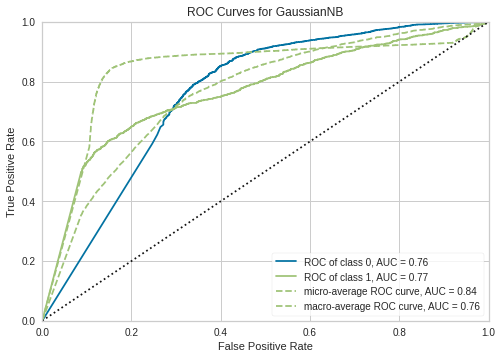

In [15]:
# Area under the curve

clf.plot_model(models[0], plot='auc')

### Obtaining naive-bayes (NB) predictions

In [16]:
pred_holdout_pyc_plain_nb = clf.predict_model(models[0])
final_pred_pyc_plain_nb = clf.finalize_model(models[0])
pred_unseen_pyc_plain_nb = clf.predict_model(final_pred_pyc_plain_nb, data=test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.8438,0.7659,0.565,0.3875,0.4597,0.3721,0.3812


Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations


In [17]:
pred_unseen_pyc_plain_nb.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,day_of_week_sin,day_of_week_cos,campaign,pdays,is_new_prospect,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,bought,Label,Score
0,36.0,services,married,high.school,no,no,no,telephone,may,1,0.951057,0.309017,1,999.0,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,1.0
1,44.0,blue_collar,single,professional.course,no,no,no,cellular,mar,0,0.000000,1.000000,1,999.0,1,0,nonexistent,-1.8,92.843,-50.0,1.811,5099.1,1,1,1.0
2,30.0,blue_collar,single,professional.course,no,no,no,cellular,aug,2,0.587785,-0.809017,4,999.0,1,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0,0,1.0
3,34.0,self_employed,single,basic_school,no,no,no,cellular,nov,1,0.951057,0.309017,1,999.0,1,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0,0,1.0
4,36.0,administration_management,married,university.degree,unknown,no,no,cellular,aug,0,0.000000,1.000000,4,999.0,1,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,0,1.0


### Calculating prediction metrics

In [18]:
from pycaret.utils import check_metric

print('Plain NB Classifier')
print('Accuracy: ', check_metric(pred_unseen_pyc_plain_nb.bought, pred_unseen_pyc_plain_nb.Label, 'Accuracy'))
print('F1: ', check_metric(pred_unseen_pyc_plain_nb.bought, pred_unseen_pyc_plain_nb.Label, 'F1'))
print('Recall: ', check_metric(pred_unseen_pyc_plain_nb.bought, pred_unseen_pyc_plain_nb.Label, 'Recall'))
print('AUC: ', check_metric(pred_unseen_pyc_plain_nb.bought, pred_unseen_pyc_plain_nb.Label, 'AUC'))

Plain NB Classifier
Accuracy:  0.8515
F1:  0.4721
Recall:  0.5647
AUC:  0.7272


### Saving the finalized NB model

In [19]:
# !mkdir /content/drive/MyDrive/ml/20201015-marketing-subs/models

model_save_path = '/content/drive/MyDrive/ml/20201015-marketing-subs/models/'
clf.save_model(final_pred_pyc_plain_nb, model_save_path + 'final_pred_pyc_plain_nb')

Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='bought',
                                       time_features=[])),
                 ('imputer',
                  Iterative_Imputer(add_indicator=False,
                                    classifier=LGBMClassifier(boosting_type='gbdt',
                                                              class_weight=None,
                                                              colsample_bytree...
                                        correlation_with_target_threshold=0.0,
                                        target_variable='bought',
                                        threshold=0.95)),
          

## Obtaining predictions from the runner-up model

### Using graphs to understand the performance of the ada-boost (AB) model

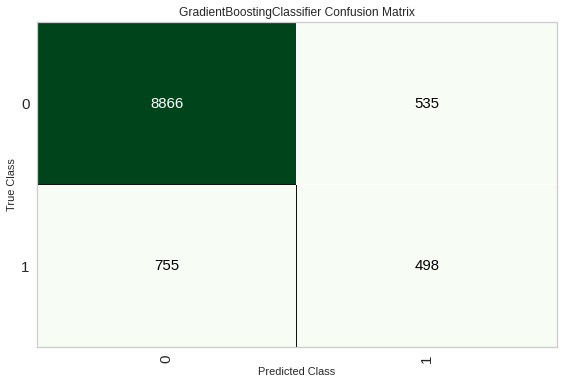

In [20]:
# Confusion matrix
clf.plot_model(models[1], plot='confusion_matrix')

In [21]:
# Deriving additional meaning from the AB classifier's confusion matrix
# T = True, F = False, P = Positive, N = Negative
# TN | FP
# FN | TP

TN, FP = 8866, 535
FN, TP = 755, 498

ACC = (TN + TP) / (TN + FP + FN + TP)
PRECISION = TP/(TP + FP)
F1 = 2 * (ACC * PRECISION) / (ACC + PRECISION)

print(f'Plain AB model ACC: {ACC:.5f} PRECISION: {PRECISION:.5f} F1: {F1:.5f}')

Plain AB model ACC: 0.87892 PRECISION: 0.48209 F1: 0.62265


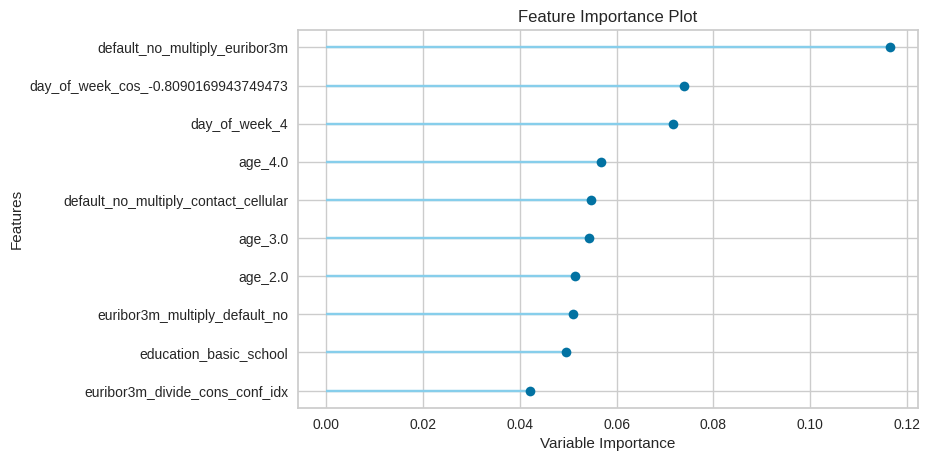

In [32]:
# Plotting feature importances

clf.plot_model(models[1], plot='feature')

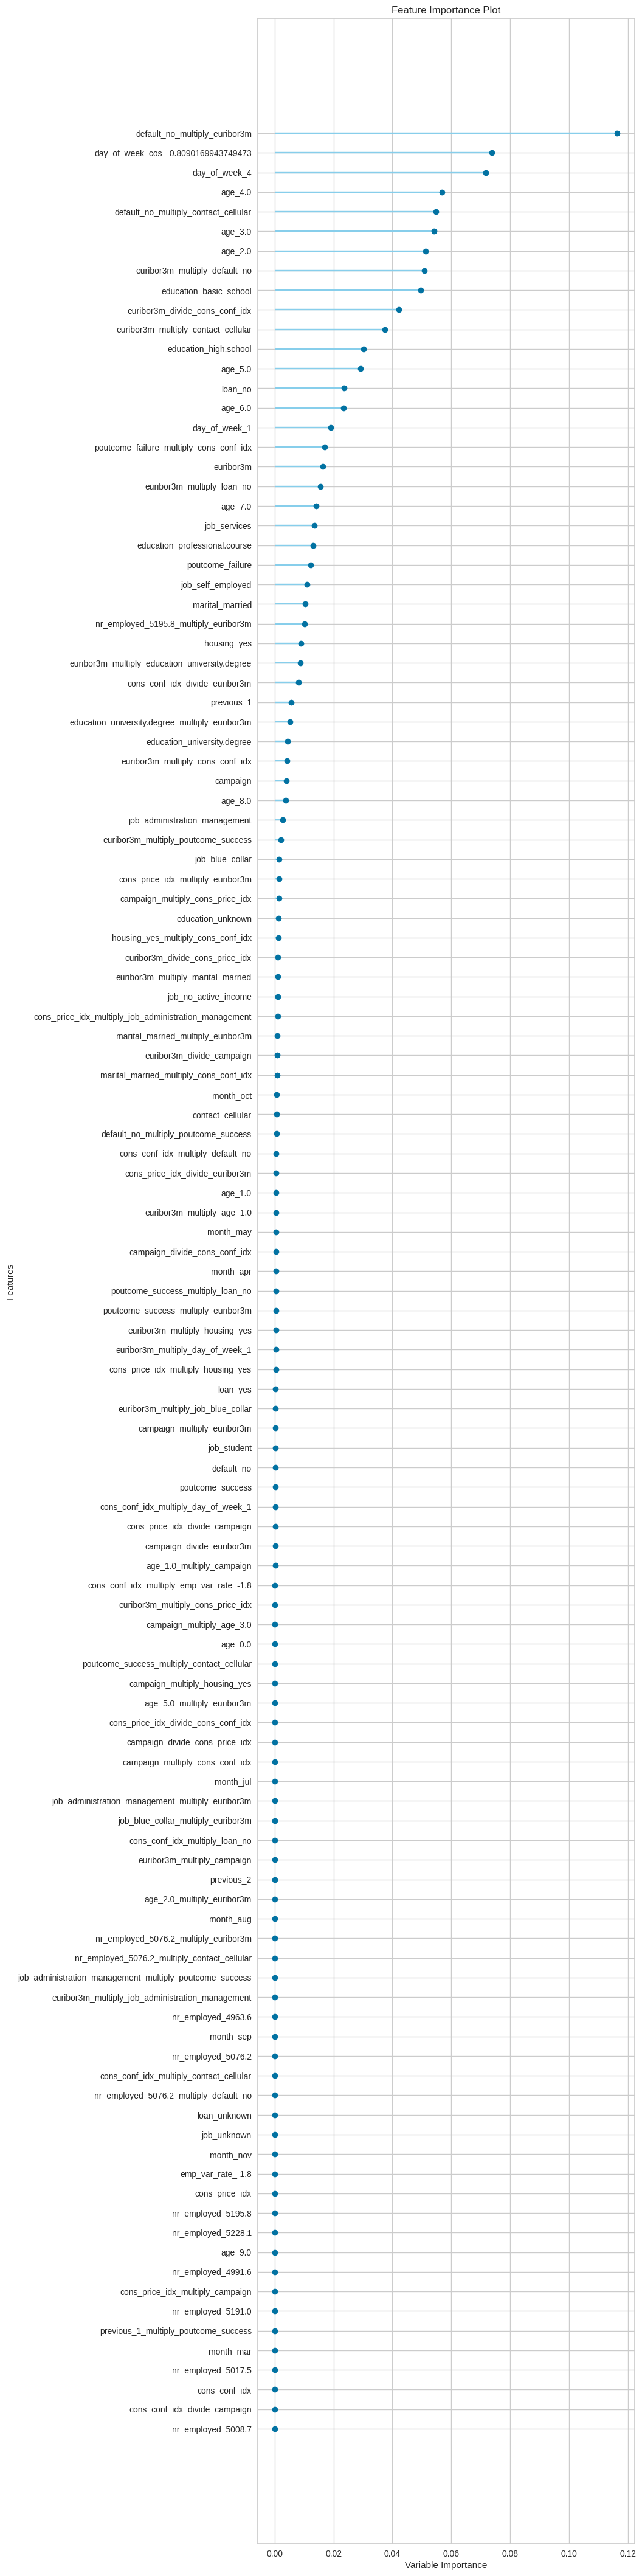

In [29]:
# Plotting feature importances

clf.plot_model(models[1], plot='feature_all')

### Obtaining AB predictions

In [27]:
pred_holdout_pyc_plain_ab = clf.predict_model(models[1])
final_pred_pyc_plain_ab = clf.finalize_model(models[1])
pred_unseen_pyc_plain_ab = clf.predict_model(final_pred_pyc_plain_ab, data=test)

pred_unseen_pyc_plain_ab.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8789,0.7812,0.3974,0.4821,0.4357,0.3686,0.3707


Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,day_of_week_sin,day_of_week_cos,campaign,pdays,is_new_prospect,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,bought,Label,Score
0,36.0,services,married,high.school,no,no,no,telephone,may,1,0.951057,0.309017,1,999.0,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0.9411
1,44.0,blue_collar,single,professional.course,no,no,no,cellular,mar,0,0.000000,1.000000,1,999.0,1,0,nonexistent,-1.8,92.843,-50.0,1.811,5099.1,1,1,0.5161
2,30.0,blue_collar,single,professional.course,no,no,no,cellular,aug,2,0.587785,-0.809017,4,999.0,1,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0,0,0.8519
3,34.0,self_employed,single,basic_school,no,no,no,cellular,nov,1,0.951057,0.309017,1,999.0,1,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0,0,0.8666
4,36.0,administration_management,married,university.degree,unknown,no,no,cellular,aug,0,0.000000,1.000000,4,999.0,1,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,0,0.8628


### Calculating prediction metrics

In [28]:
print('Plain AB Classifier')
print('Accuracy: ', check_metric(pred_unseen_pyc_plain_ab.bought, pred_unseen_pyc_plain_ab.Label, 'Accuracy'))
print('F1: ', check_metric(pred_unseen_pyc_plain_ab.bought, pred_unseen_pyc_plain_ab.Label, 'F1'))
print('Recall: ', check_metric(pred_unseen_pyc_plain_ab.bought, pred_unseen_pyc_plain_ab.Label, 'Recall'))
print('AUC: ', check_metric(pred_unseen_pyc_plain_ab.bought, pred_unseen_pyc_plain_ab.Label, 'AUC'))

Plain AB Classifier
Accuracy:  0.8844
F1:  0.483
Recall:  0.4591
AUC:  0.7001


### Saving the finalized AB model

In [31]:
model_save_path = '/content/drive/MyDrive/ml/20201015-marketing-subs/models/'
clf.save_model(final_pred_pyc_plain_ab, model_save_path + 'final_pred_pyc_plain_ab')

Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='bought',
                                       time_features=[])),
                 ('imputer',
                  Iterative_Imputer(add_indicator=False,
                                    classifier=LGBMClassifier(boosting_type='gbdt',
                                                              class_weight=None,
                                                              colsample_bytree...
                                             learning_rate=0.1, loss='deviance',
                                             max_depth=3, max_features=None,
                                             max_leaf_n